In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.8/112.6 GB disk)


In [3]:

from ultralytics import YOLO

from IPython.display import display, Image

In [4]:
!mkdir {HOME}/dataset
%cd {HOME}/dataset
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("CV-project-vu7ji").project("indian-traffic-signboards")
version = project.version(5)
dataset = version.download("yolov11")


mkdir: cannot create directory ‘/content/dataset’: File exists
/content/dataset
loading Roboflow workspace...
loading Roboflow project...


In [5]:
dataset.location

'/content/dataset/Indian-Traffic-Signboards--5'

In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=10 imgsz=800 plots=True


/content
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/dataset/Indian-Traffic-Signboards--5/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_

In [7]:
!ls {HOME}/runs/detect/train/

args.yaml					    labels.jpg	      train_batch2.jpg
events.out.tfevents.1733085012.df54e162f792.1106.0  train_batch0.jpg  weights
labels_correlogram.jpg				    train_batch1.jpg


/content


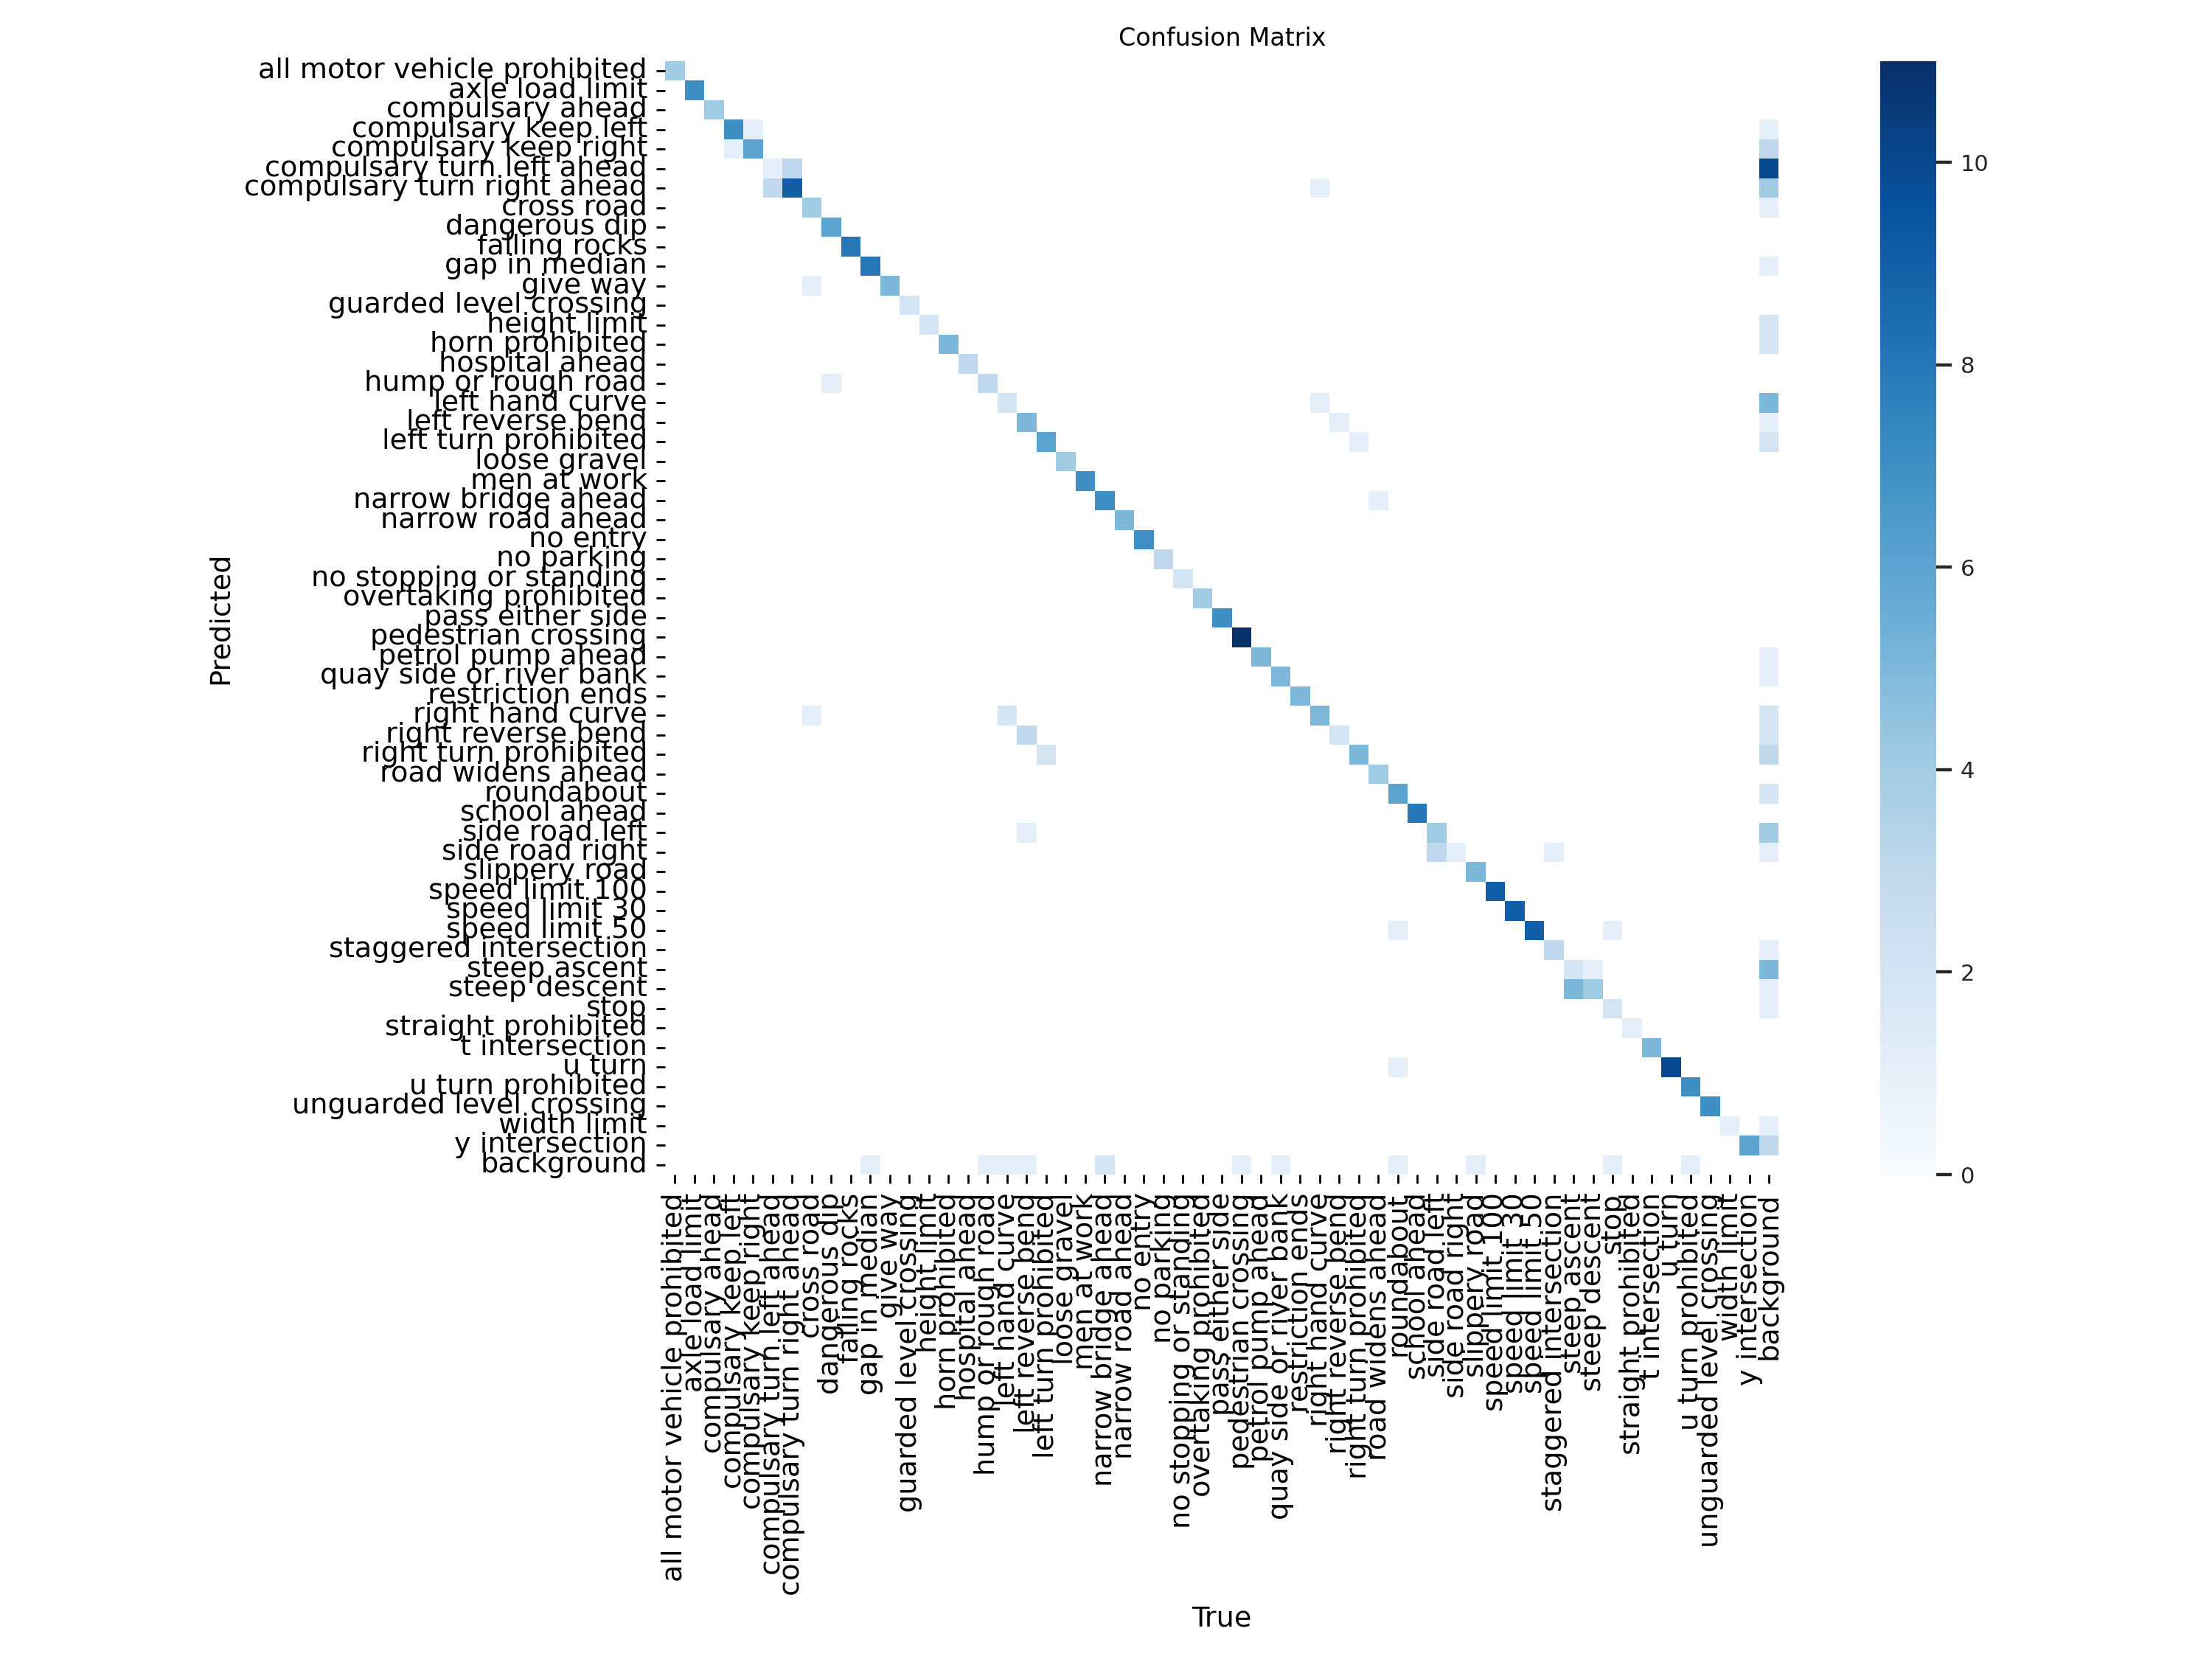

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', height=1000, width=1800)

/content


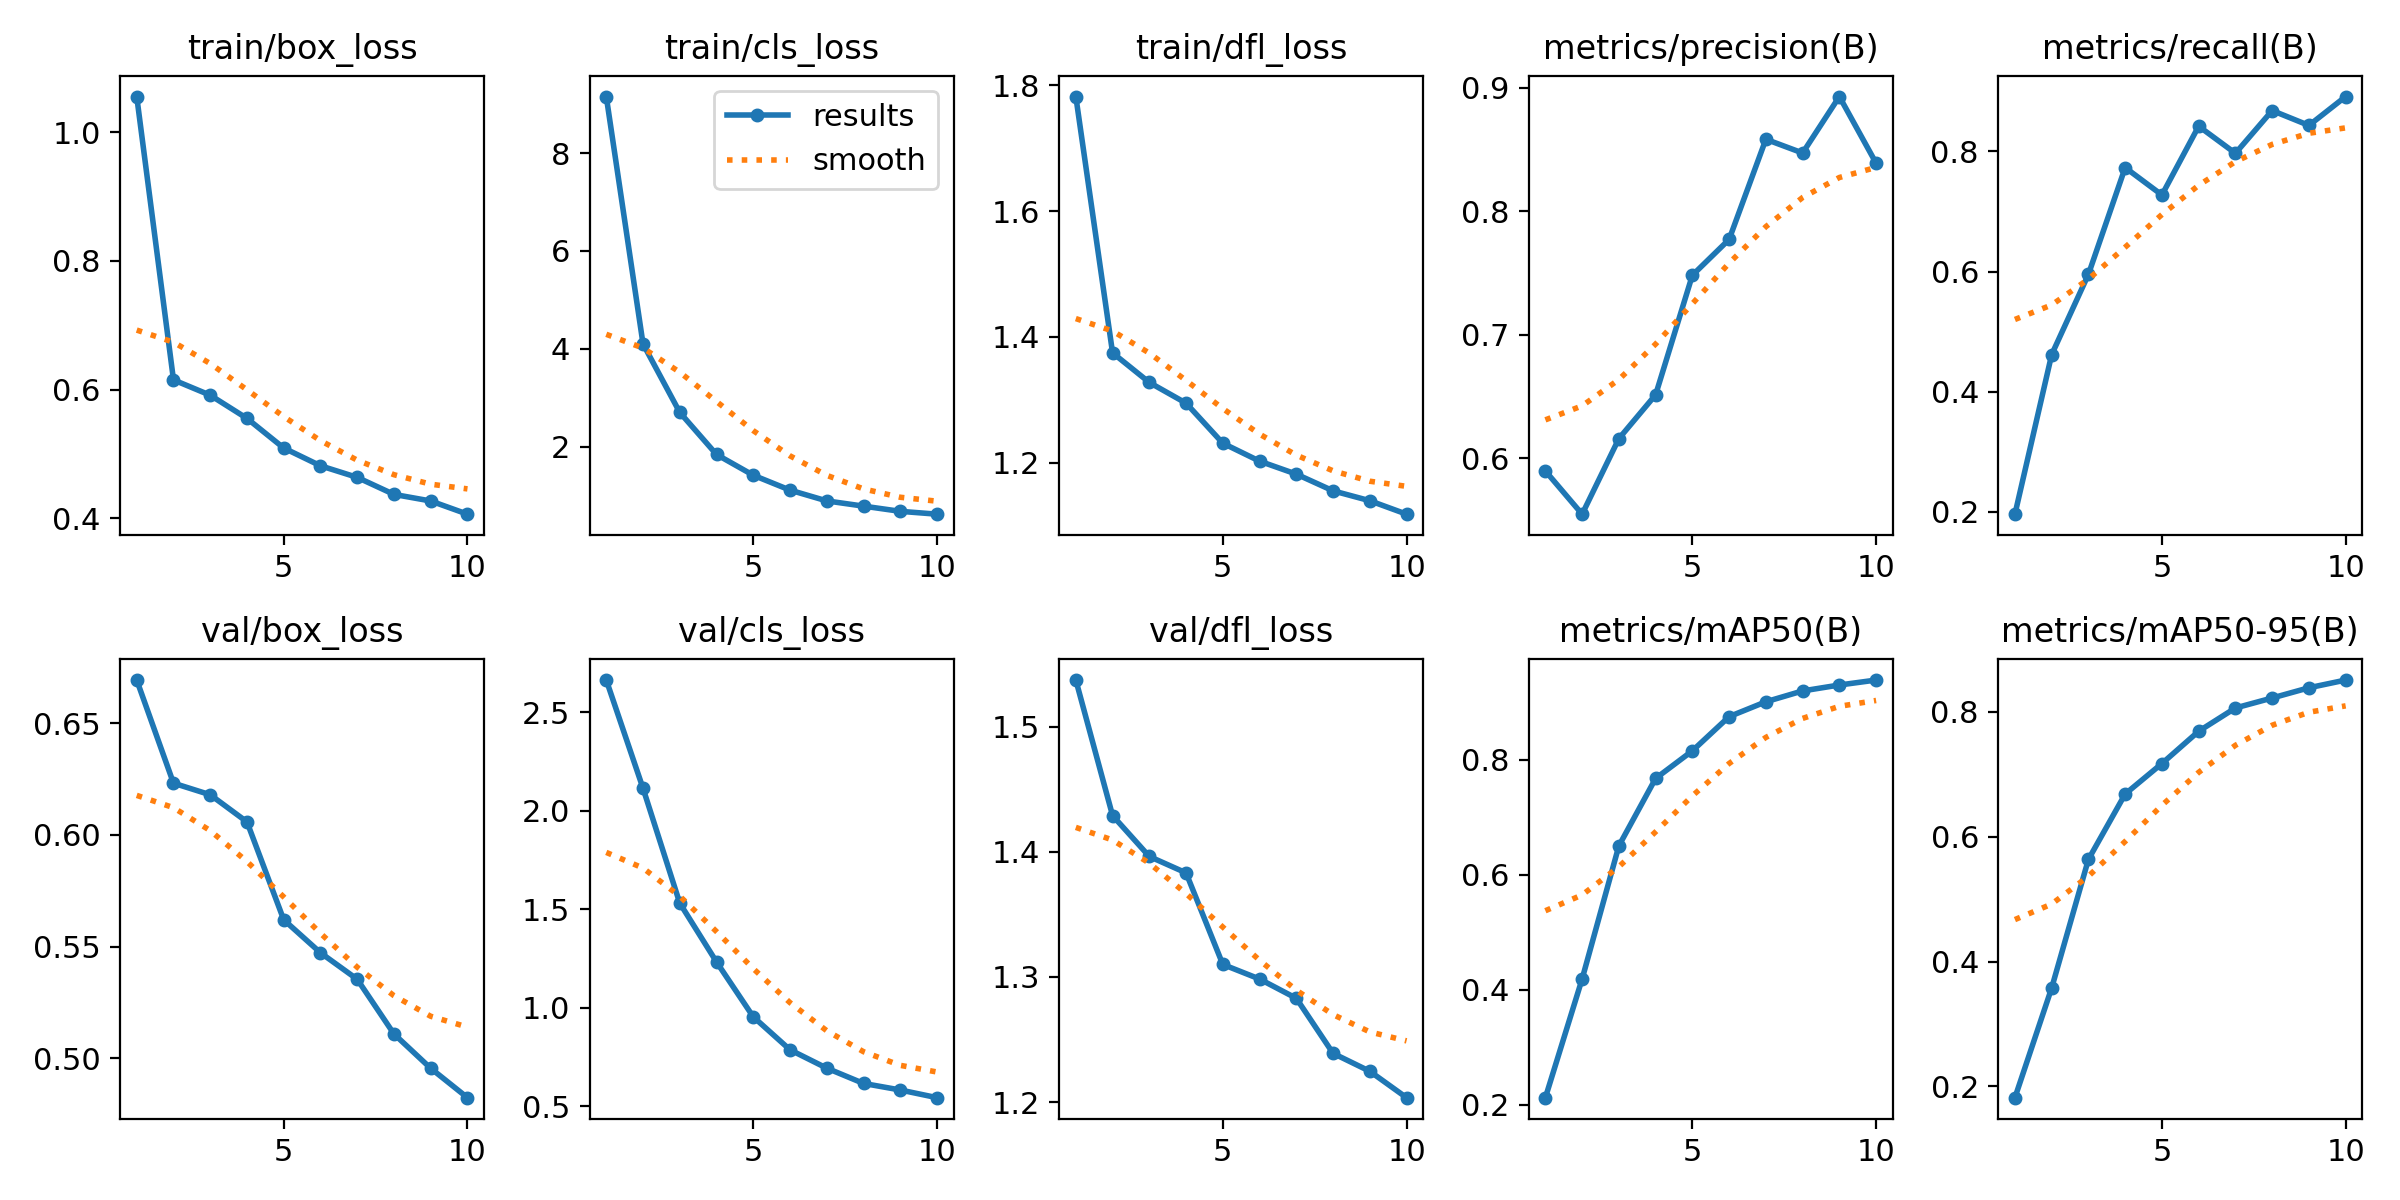

In [18]:

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=1600)

/content


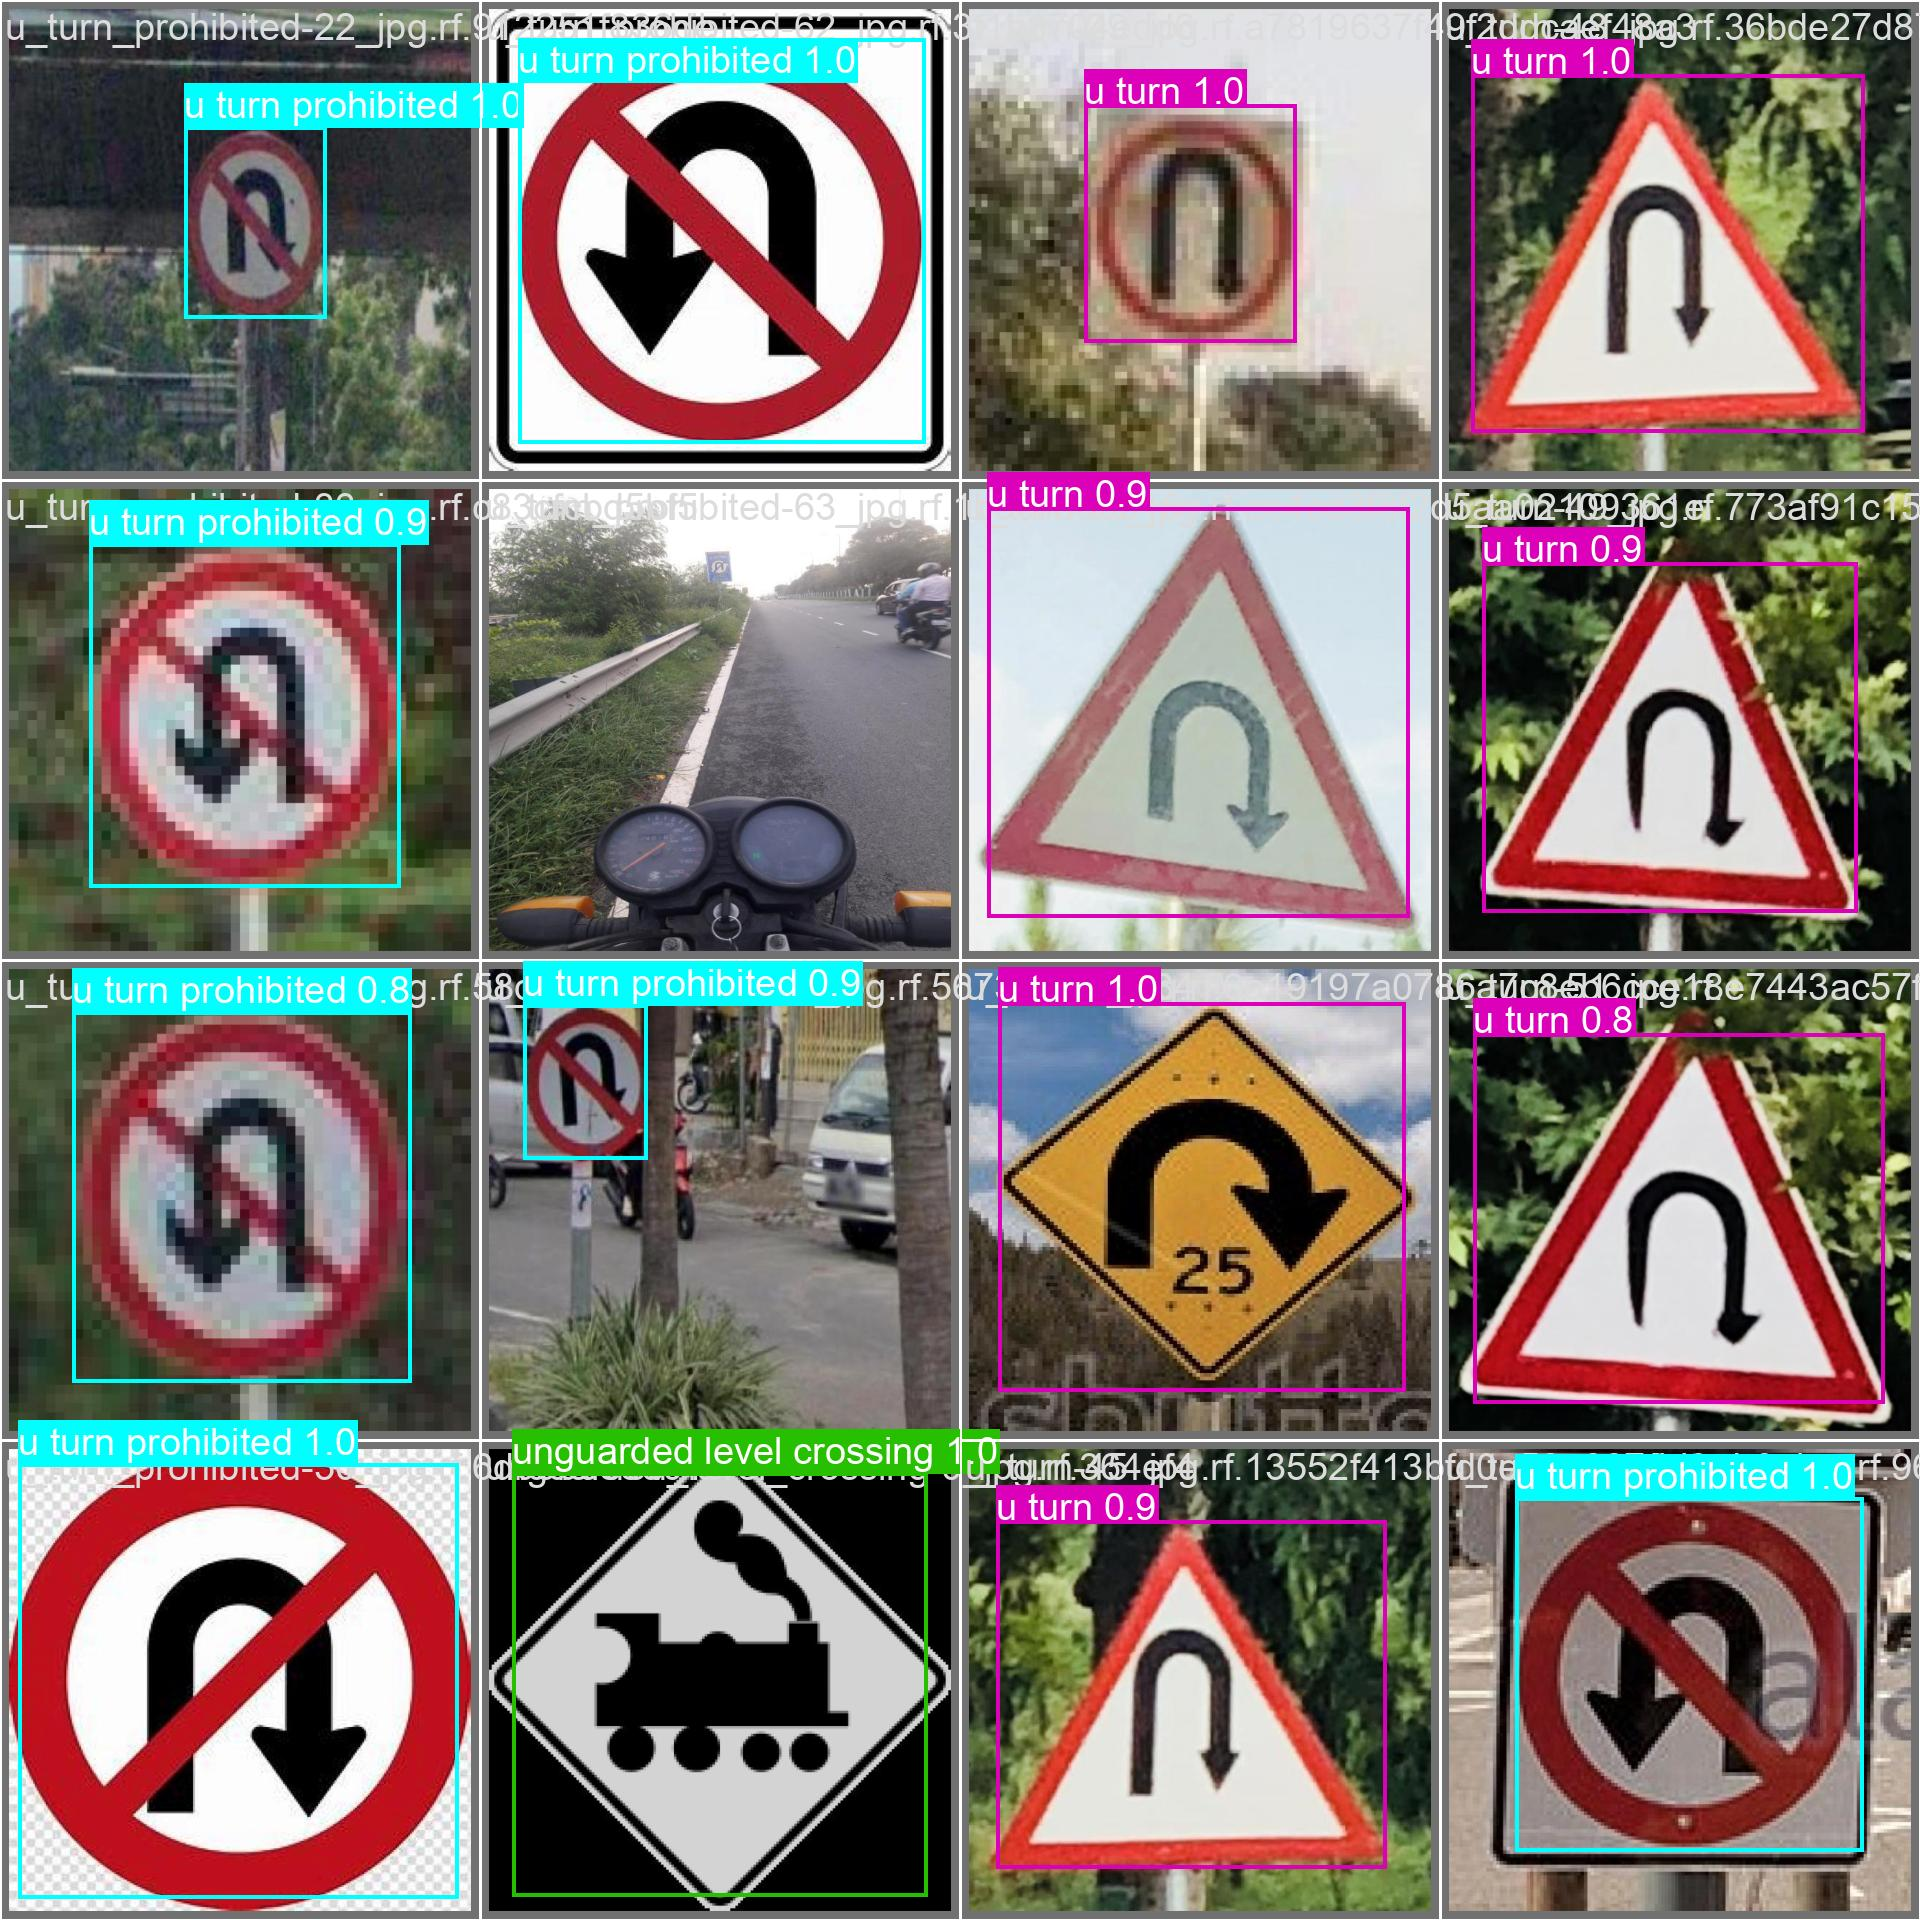

In [20]:

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=1000)

In [21]:

%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,434,472 parameters, 0 gradients, 21.4 GFLOPs
val: Scanning /content/dataset/Indian-Traffic-Signboards--5/valid/labels.cache... 333 images, 0 backgrounds, 0 corrupt: 100% 333/333 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 21/21 [00:08<00:00,  2.46it/s]
                   all        333        333      0.837      0.894      0.938      0.849
all motor vehicle prohibited          4          4      0.909          1      0.995      0.804
       axle load limit          7          7      0.941          1      0.995      0.962
      compulsary ahead          4          4      0.906          1      0.995      0.946
  compulsary keep left          8          8       0.86      0.772      0.954      0.812
 compulsary keep right          7          7      0.675      0.857      0.944       0.89
compulsar